In [169]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [170]:
df = pd.read_csv('Rice_Cammeo_Osmancik.csv')
df

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

In [171]:
# Check class distribution
class_distribution = df['Class'].value_counts()
print(class_distribution)
df

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


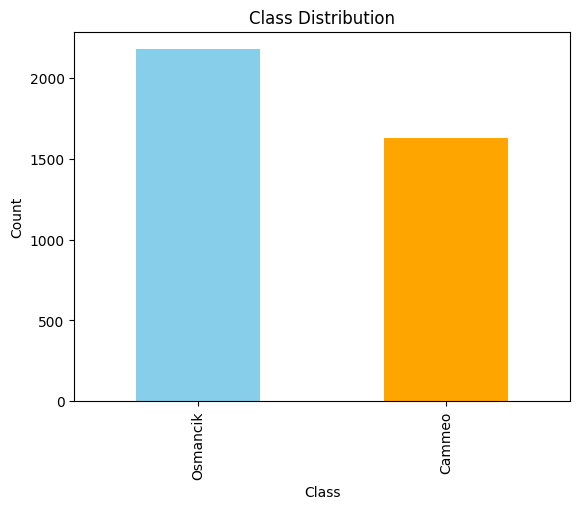

In [172]:
# Plot class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [173]:

# Display general information about the dataset
print("Dataset Information:")
df.info()

# Display the number of observations (rows) and attributes (columns)
print("\nTotal Number of Observations:", df.shape[0])
print("Total Number of Attributes:", df.shape[1])

# Display the first few rows (optional, for context)
print("\nSample Data:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB

Total Number of Observations: 3810
Total Number of Attributes: 9

Sample Data:
   ID     Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0   1  15231.0  525.578979         229.749878          85.093788   
1   2  14656.0  494.311005         206.020065          91.730972 

**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [174]:
# Drop the 'Extent' column if deemed unusable
df = df.drop(columns=['ID'], errors='ignore')

# Verify the updated DataFrame
print(df.head())

      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  


**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [175]:
# Display a count of missing observations in each attribute
missing_values = df.isnull().sum()
print("Count of Missing Observations in Each Attribute:")
print(missing_values)

Count of Missing Observations in Each Attribute:
Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Convex_Area          1
Extent               0
Class                0
dtype: int64


In [176]:
# Remove observations (rows) with missing values
df_cleaned = df.dropna()
df = df.dropna()
# Verify the updated dataset
print("\nUpdated DataFrame After Removing Missing Observations:")
print(df_cleaned.head())

# Display the number of remaining observations
print("\nRemaining Observations:", df_cleaned.shape[0])


Updated DataFrame After Removing Missing Observations:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  

Remaining Observations: 3801


**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [177]:
# Identify numeric attributes in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Display the list of numeric attribute names
print("Numeric Attributes:", numeric_columns)

Numeric Attributes: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']


**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [178]:
# Display the five-number summary for all numeric attributes
five_number_summary = df.describe().loc[['min', '25%', '50%', '75%', 'max']]

# Display the summary
print("Five-Number Summary for Numeric Attributes:")
print(five_number_summary)

Five-Number Summary for Numeric Attributes:
        Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
min   7551.0  359.100006         145.264465          59.532406      0.777233   
25%  11372.0  426.165008         174.358124          82.721268      0.872438   
50%  12419.0  448.846008         185.801941          86.428650      0.889033   
75%  13950.0  483.657989         203.523453          90.133011      0.902622   
max  18913.0  548.445984         239.010498         107.542450      0.948007   

     Convex_Area    Extent  
min       7723.0  0.497413  
25%      11627.0  0.598778  
50%      12705.0  0.645370  
75%      14280.0  0.726608  
max      19099.0  0.861050  


**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

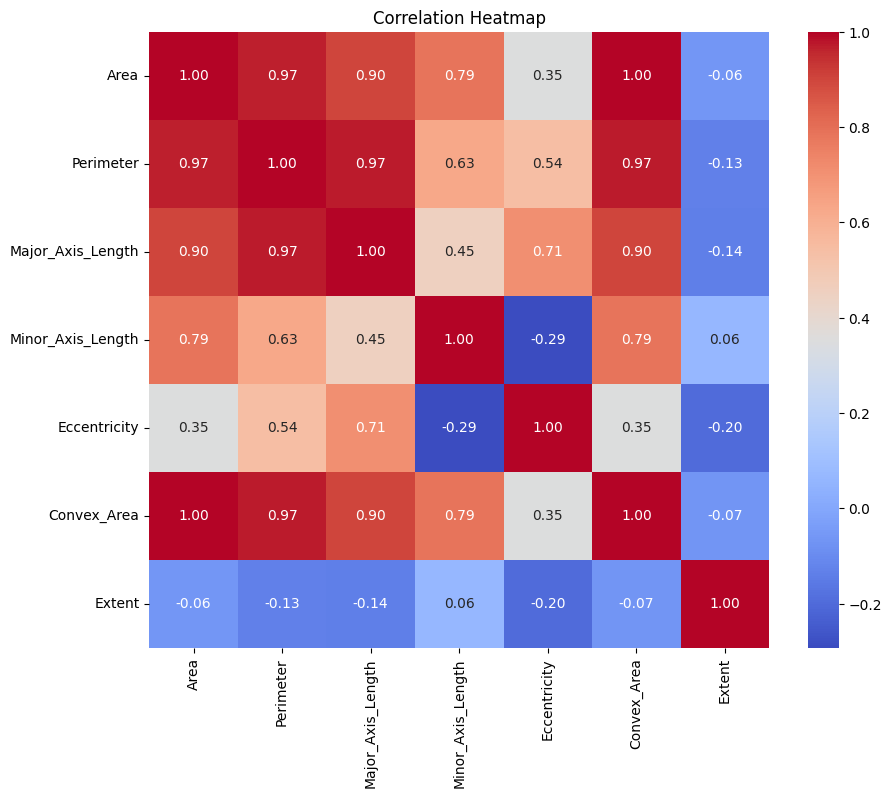

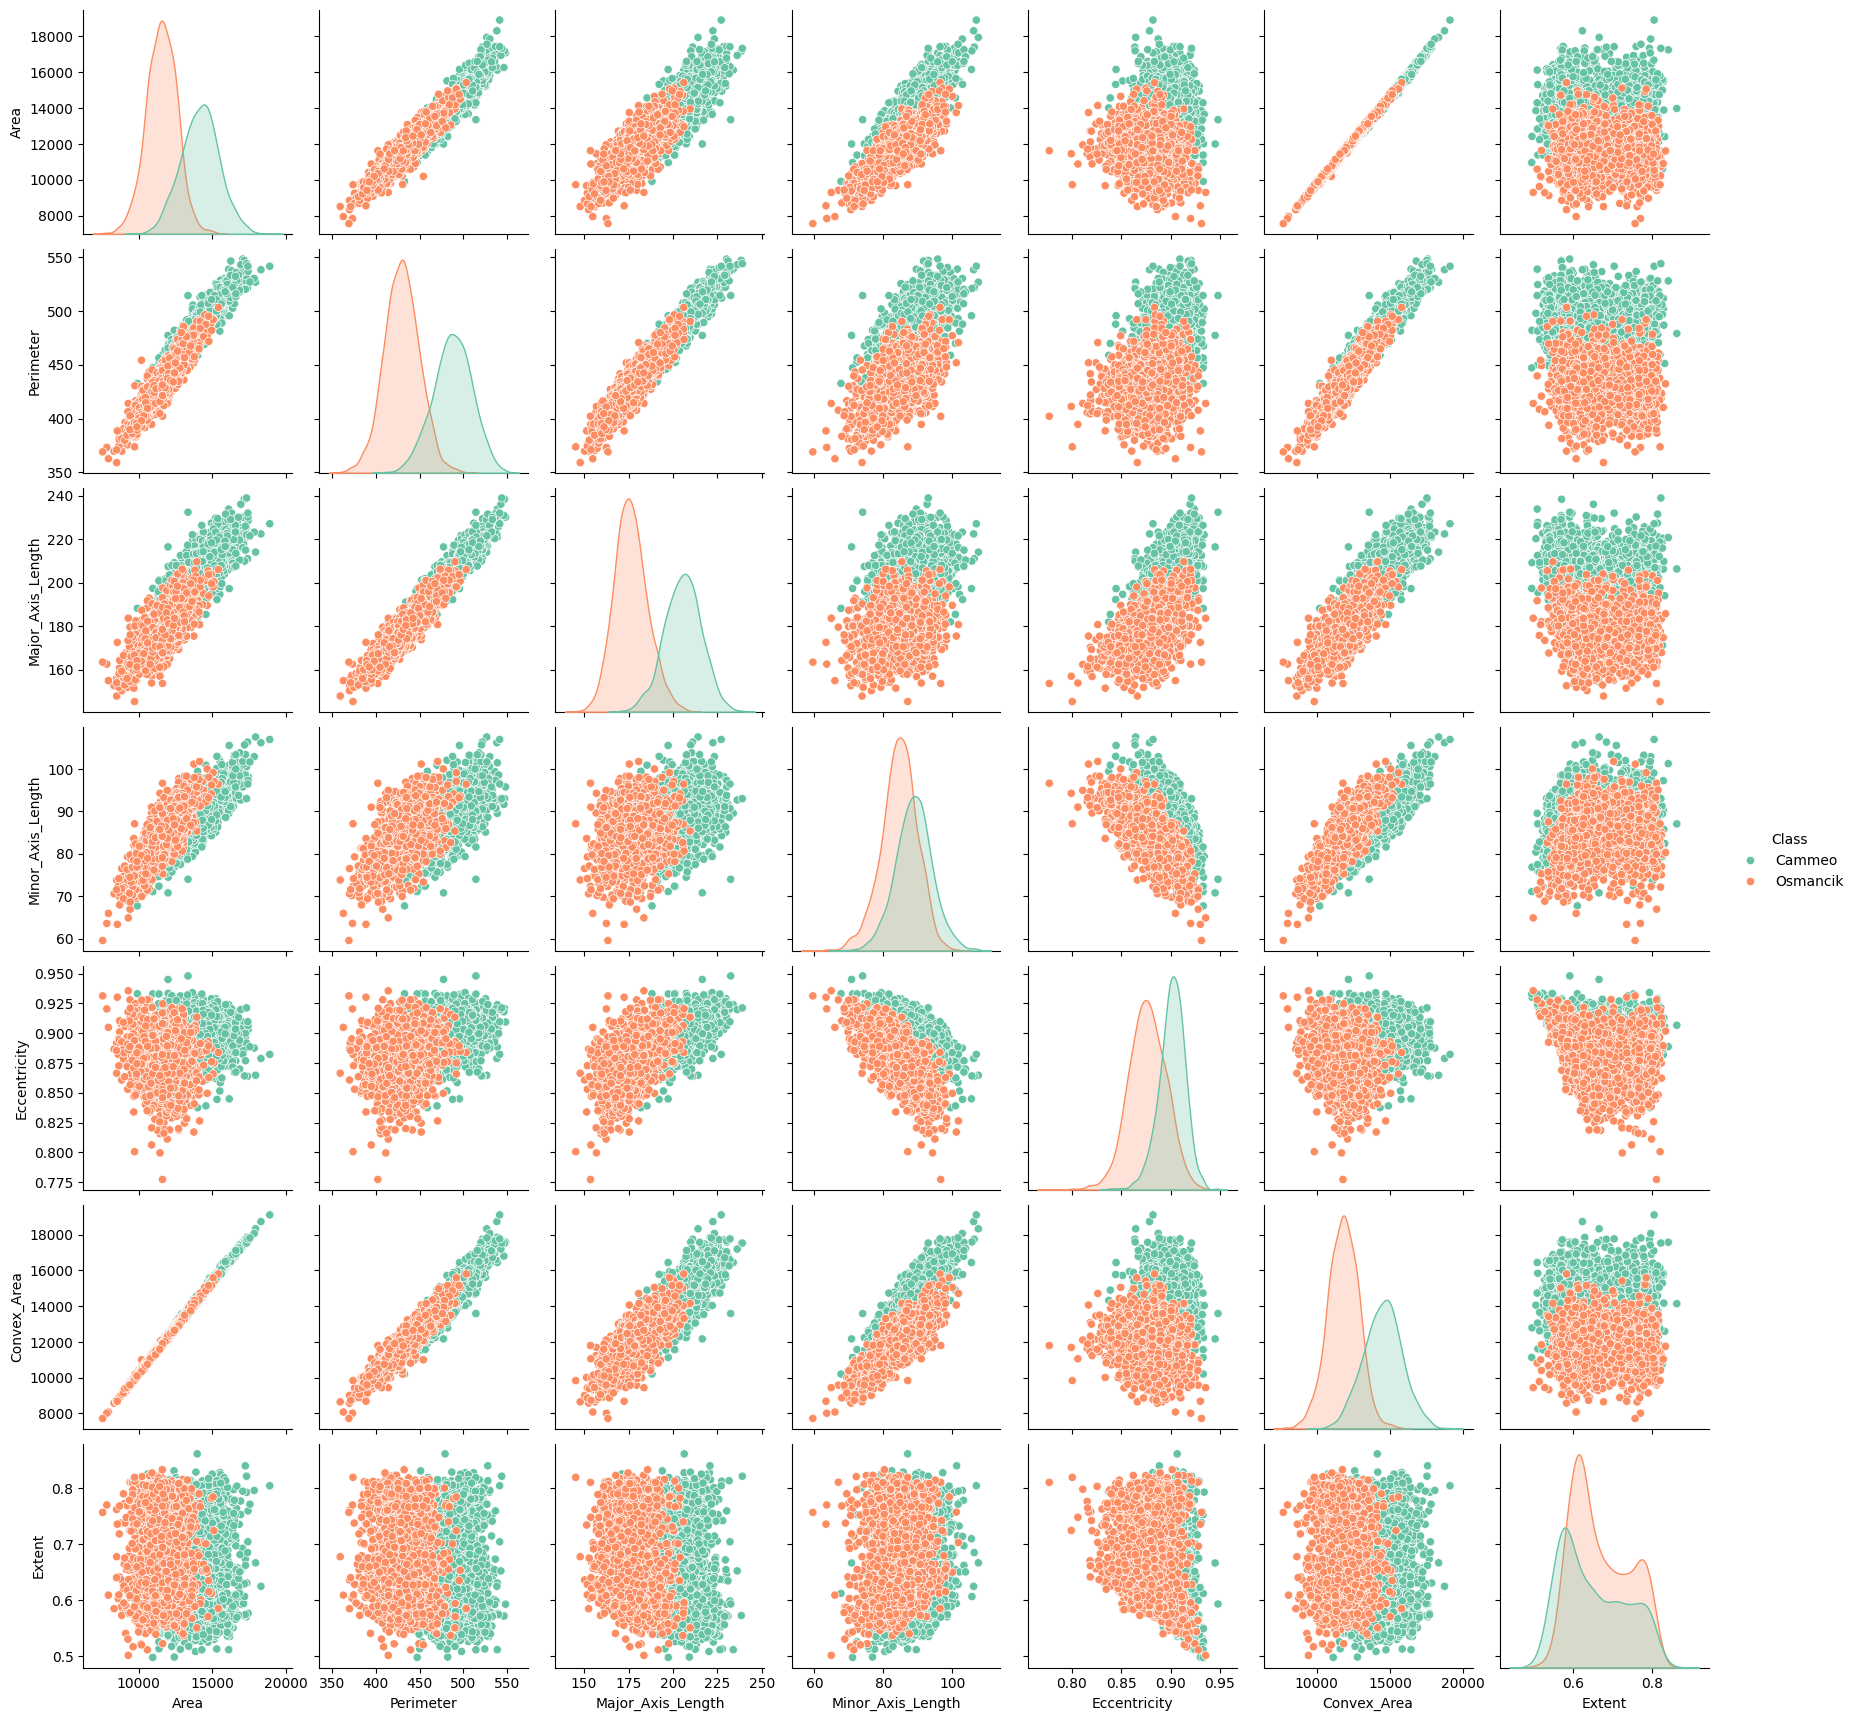

In [179]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# # Encode the 'Class' column to numeric
# le = LabelEncoder()

# df_cleaned = df
# df_cleaned['Class'] = le.fit_transform(df_cleaned['Class'])
numeric_data = df[numeric_columns].corr()
# Plot the correlation table

# Plot a heatmap of the correlation table
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Generate the pairplot with the 'Class' attribute encoded
sns.pairplot(df, hue="Class", diag_kind="kde", palette="Set2")
plt.show()

In [180]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

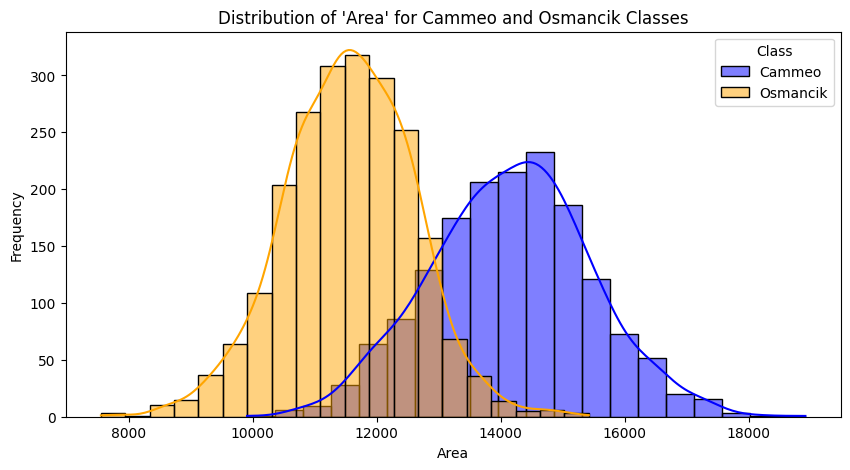

In [181]:
# Plot the distribution of 'Area' for 'Cammeo'

plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Class'] == 'Cammeo'], x='Area', kde=True, color='blue', label='Cammeo', bins=20)
sns.histplot(data=df[df['Class'] == 'Osmancik'], x='Area', kde=True, color='orange', label='Osmancik', bins=20)

plt.title("Distribution of 'Area' for Cammeo and Osmancik Classes")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.legend(title="Class")
plt.show()

# Observation: Cammeo has larger area but there's a large intersection where both species share similar area values.

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

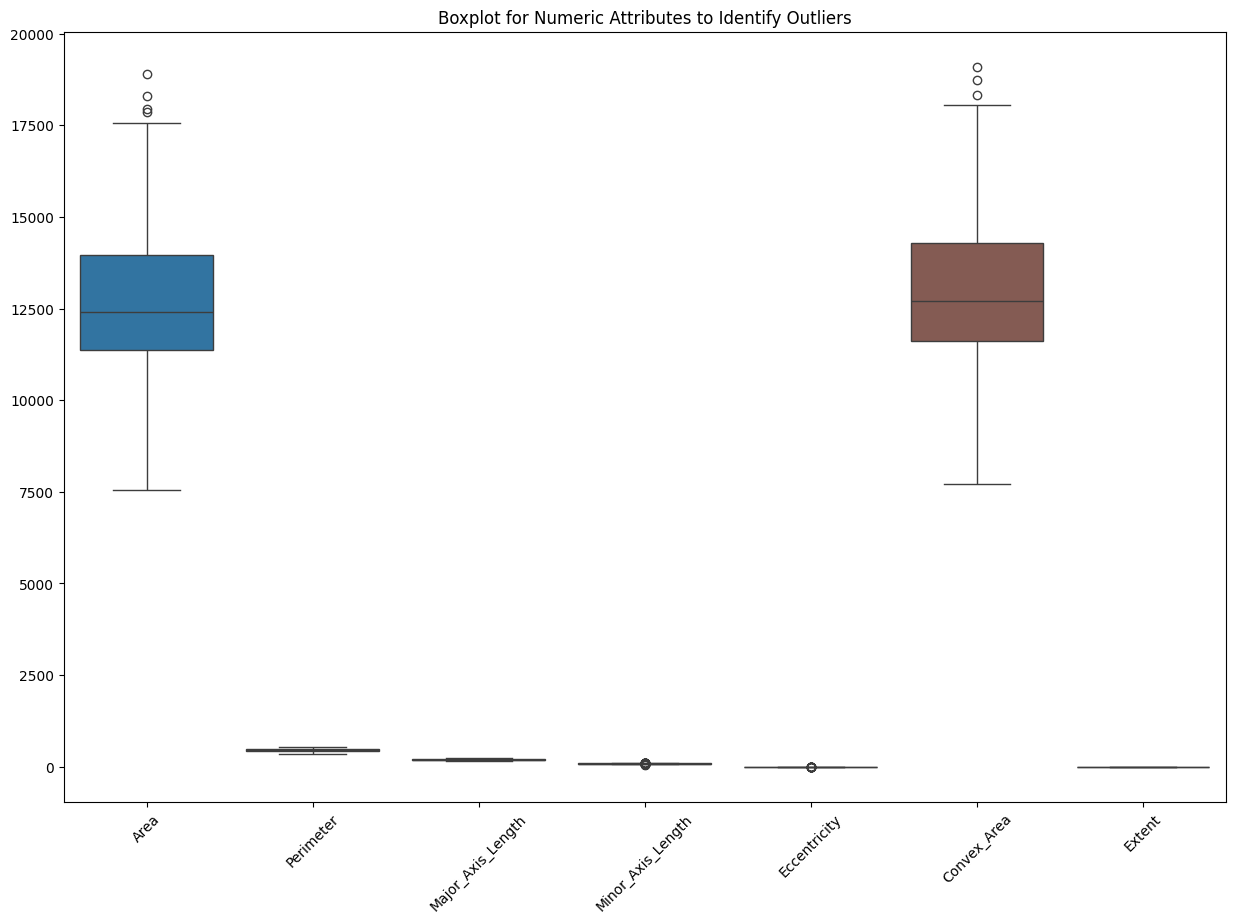

In [182]:
# Create boxplots for all numeric attributes
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot for Numeric Attributes to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

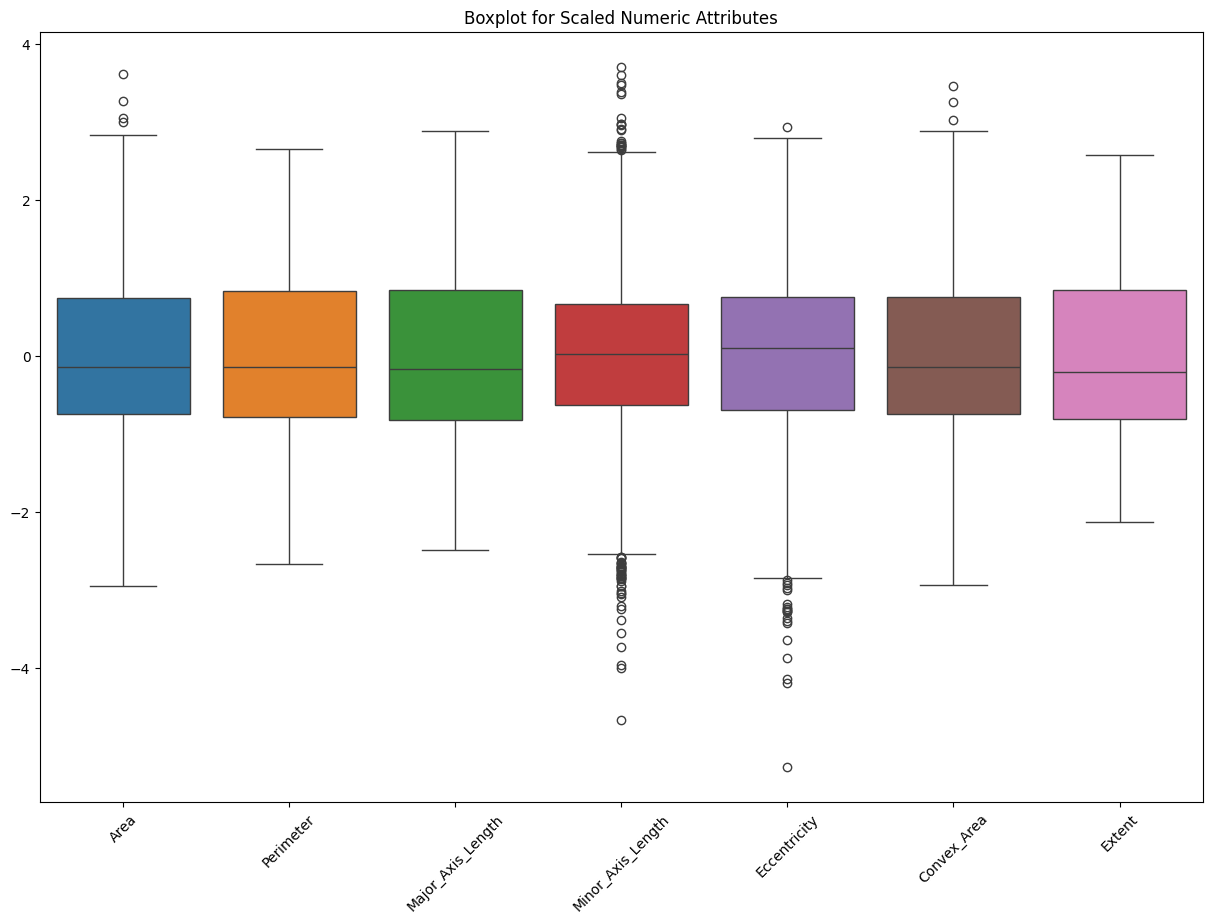

In [183]:
# Select numeric columns
numeric_columns = df.select_dtypes(include="number").columns

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Visualize the scaled data
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df)
plt.title("Boxplot for Scaled Numeric Attributes")
plt.xticks(rotation=45)
plt.show()



**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [184]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Class' column
df['Class'] = label_encoder.fit_transform(df['Class'])

# Map encoding back to categories
print("Class encoding mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Class encoding mapping: {'Cammeo': 0, 'Osmancik': 1}


## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [185]:
# Features (X) and Target (y)
X = df.drop(columns='Class')  # Use the scaled data from the previous steps
y = df['Class']  # Original target column


In [186]:
# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the class distribution
print("Training set class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Testing set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

Training set class distribution: {0: 1137, 1: 1523}
Testing set class distribution: {0: 488, 1: 653}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the kNN classifier with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# Train the kNN classifier using the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN (k=1): {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       488
           1       0.88      0.87      0.87       653

    accuracy                           0.86      1141
   macro avg       0.85      0.85      0.85      1141
weighted avg       0.86      0.86      0.86      1141

Accuracy of kNN (k=1): 0.86


In [188]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.83      0.84      0.83       488
    Osmancik       0.88      0.87      0.87       653

    accuracy                           0.86      1141
   macro avg       0.85      0.85      0.85      1141
weighted avg       0.86      0.86      0.86      1141



In [ ]:
'''

Conclusion:
The k-Nearest Neighbors classifier with one neighbor successfully classified the rice grain classes, 
achieving high accuracy in distinguishing between Cammeo and Osmancik. 
This demonstrates that the features such as Area, Perimeter, and Eccentricity are effective in separating the two classes, 
though additional tuning of k or feature engineering may further enhance performance.

'''
